In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams

In [2]:
systems=['ef34','actinin_ef34','titin_ef34']
labels1=['EF3-4','EF3-4 - actinin','EF3-4 - titin']
labels2=['WT','A868T']

nPCs=3
path='/home/xfang2/backup/faust_backup/actinin'

In [3]:
ncolors = 256
color_array = plt.get_cmap('turbo')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
color_array[0,-1] = 1
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)


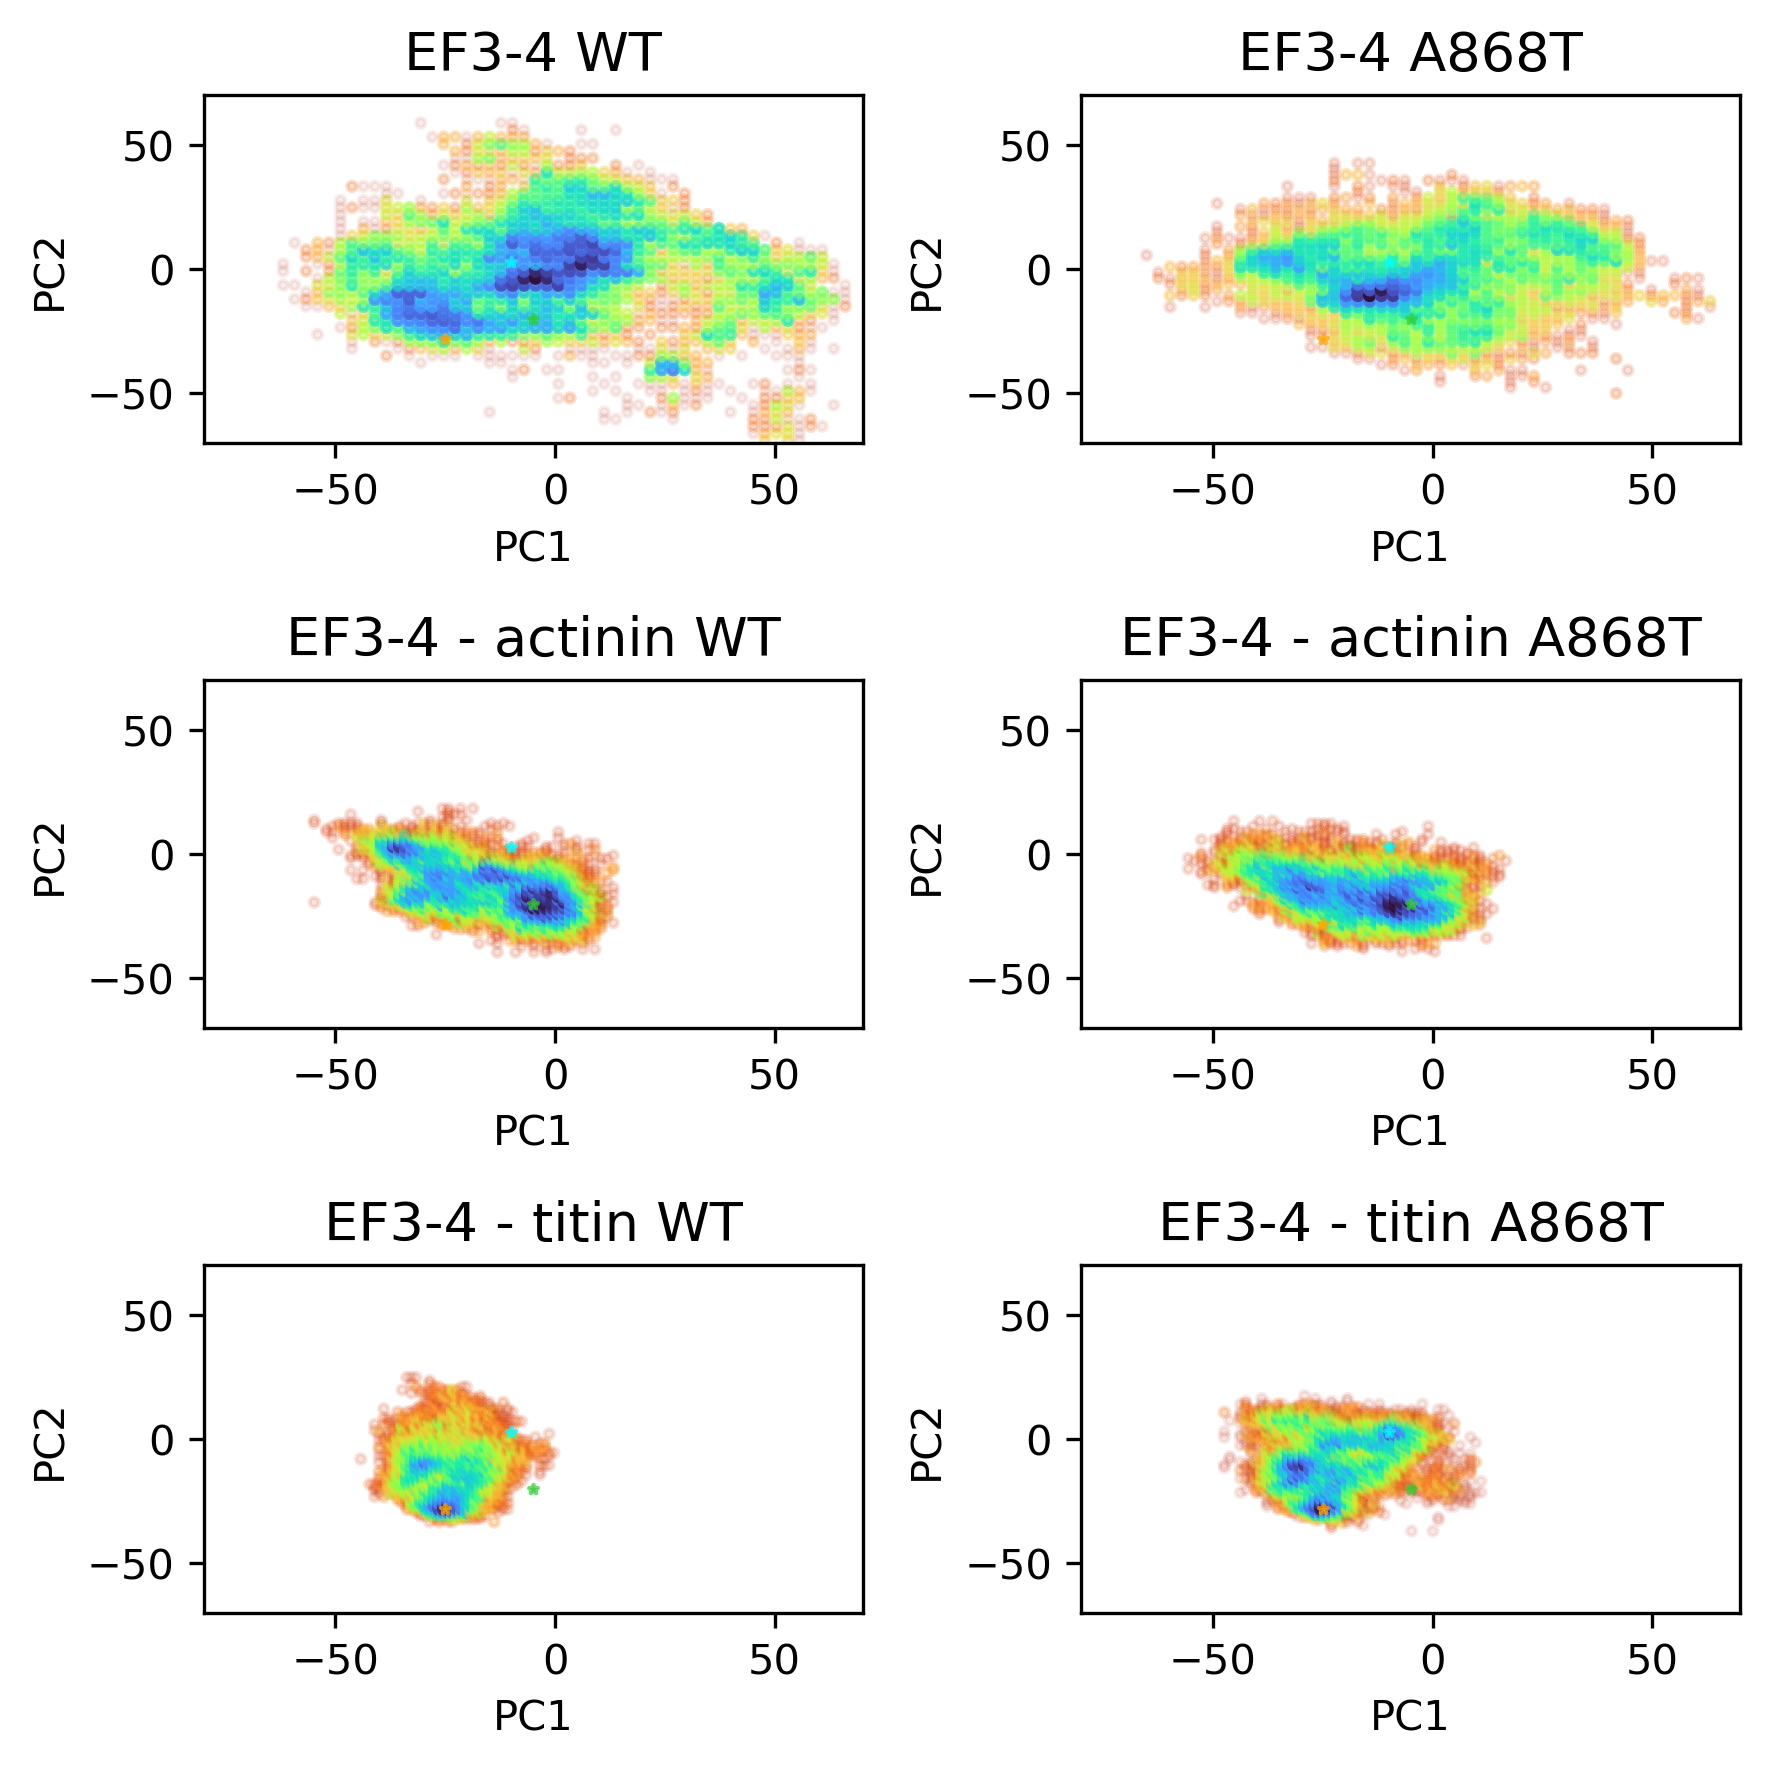

In [7]:
# paper fig
rcParams['figure.figsize']=6,6
rcParams['font.size']=10
rcParams['figure.dpi']=300
idx1=1
idx2=2
comp=2

fig=plt.figure()
count=0
for i,sys in enumerate(systems): 
    for j,case in enumerate(['wt','a868t']):   
        ax=fig.add_subplot(3,2,count+1)
        ax.set_xlim([-80, 70])
        ax.set_ylim([-70, 70])
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title(labels1[i]+' '+labels2[j],fontsize=13)

        data=np.genfromtxt(path+'/{}/{}/analyses/pca/hists_{}-{}.gnu'.format(sys,case,idx1,idx2),skip_header=7,skip_footer=3)
        X,Y,drawdata=data[:,0],data[:,1],data[:,2]
        ax.scatter(X,Y,c=drawdata,cmap=map_object,s=5,marker="o",vmax=3.008)    
        
        r=3
        
        # region1
        #ax.scatter(0,0,s=5,color='tab:red',alpha=0.7,marker='*') 
        # region2
        #ax.scatter(-15,-10,s=5,color='yellow',alpha=0.7,marker='*')
        # region3
        ax.scatter(-5,-20,s=5,color='limegreen',alpha=0.7,marker='*')
        # region4
        ax.scatter(-25,-28,s=5,color='orange',alpha=0.7,marker='*')
        # region5
        ax.scatter(-10,3,s=5,color='cyan',alpha=0.7,marker='*')
        
        count+=1
plt.tight_layout()
plt.gcf().savefig('pca.png')

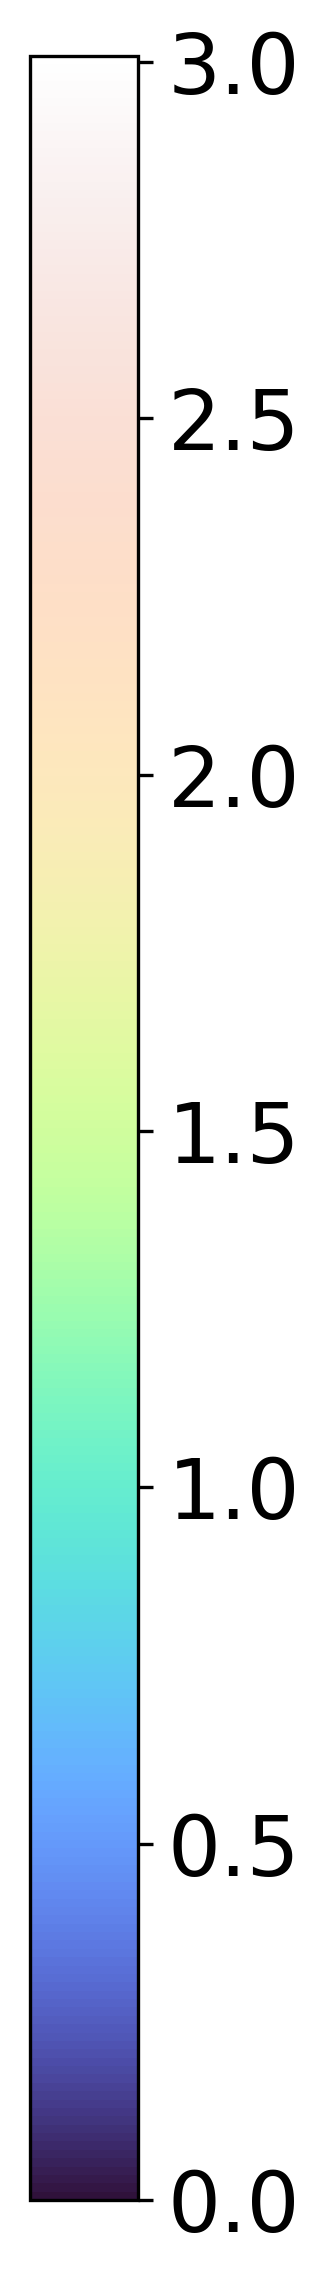

In [6]:
# get color bar
rcParams['figure.figsize']=1.5, 8
rcParams['font.size']=20
rcParams['figure.dpi']=300
fig=plt.figure()
ax=fig.add_subplot(111)

norm=matplotlib.colors.Normalize(vmin=np.min(drawdata), vmax=3.008)
matplotlib.colorbar.ColorbarBase(ax, cmap=map_object,norm=norm)

plt.tight_layout()
plt.savefig('pca_colorbar.png')